In [2]:
import numpy as np
import pandas as pd

In [3]:
unemployment =  pd.read_csv('unemp.csv')
unemployment.head(5)

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,LRHUTTFE,"Unemployment rate (monthly), Total, Females",STSA,"Level, rate or quantity series, s.a.",Q,Quarterly,2019-Q3,Q3-2019,PC,Percentage,0,Units,NaN,NaN,5.145573,NaN,NaN
1,AUS,Australia,LRHUTTFE,"Unemployment rate (monthly), Total, Females",STSA,"Level, rate or quantity series, s.a.",Q,Quarterly,2019-Q4,Q4-2019,PC,Percentage,0,Units,NaN,NaN,5.023821,NaN,NaN
2,AUS,Australia,LRHUTTFE,"Unemployment rate (monthly), Total, Females",STSA,"Level, rate or quantity series, s.a.",Q,Quarterly,2020-Q1,Q1-2020,PC,Percentage,0,Units,NaN,NaN,5.076227,NaN,NaN
3,AUS,Australia,LRHUTTFE,"Unemployment rate (monthly), Total, Females",STSA,"Level, rate or quantity series, s.a.",Q,Quarterly,2020-Q2,Q2-2020,PC,Percentage,0,Units,NaN,NaN,6.758030,NaN,NaN
4,AUS,Australia,LRHUTTMA,"Unemployment rate (monthly), Total, Males",STSA,"Level, rate or quantity series, s.a.",Q,Quarterly,2019-Q3,Q3-2019,PC,Percentage,0,Units,NaN,NaN,5.308589,NaN,NaN


In [4]:
unemployment['Subject'].value_counts()


Unemployment rate (monthly), Total, Females        704
Unemployment rate (monthly), Total, Males          704
Unemployment rate (monthly), Total, All persons    704
Name: Subject, dtype: int64

#### This dataset mainly specifies about the Unemployment rates for males, females and total each with 704 records

In [5]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               2112 non-null   object 
 1   Country                2112 non-null   object 
 2   SUBJECT                2112 non-null   object 
 3   Subject                2112 non-null   object 
 4   MEASURE                2112 non-null   object 
 5   Measure                2112 non-null   object 
 6   FREQUENCY              2112 non-null   object 
 7   Frequency              2112 non-null   object 
 8   TIME                   2112 non-null   object 
 9   Time                   2112 non-null   object 
 10  Unit Code              2112 non-null   object 
 11  Unit                   2112 non-null   object 
 12  PowerCode Code         2112 non-null   int64  
 13  PowerCode              2112 non-null   object 
 14  Reference Period Code  0 non-null      float64
 15  Refe

#### Here we can see there are no Null records for the dataset in each coloumn 

In [6]:
reduced_unemployment = unemployment[["Country", "Subject", "TIME", "Value"]]
reduced_unemployment.head(10)

,Country,Subject,TIME,Value
0,Australia,"Unemployment rate (monthly), Total, Females",2019-Q3,5.145573
1,Australia,"Unemployment rate (monthly), Total, Females",2019-Q4,5.023821
2,Australia,"Unemployment rate (monthly), Total, Females",2020-Q1,5.076227
3,Australia,"Unemployment rate (monthly), Total, Females",2020-Q2,6.758030
4,Australia,"Unemployment rate (monthly), Total, Males",2019-Q3,5.308589
5,Australia,"Unemployment rate (monthly), Total, Males",2019-Q4,5.290879
6,Australia,"Unemployment rate (monthly), Total, Males",2020-Q1,5.293045
7,Australia,"Unemployment rate (monthly), Total, Males",2020-Q2,7.130462
8,Australia,"Unemployment rate (monthly), Total, All persons",2019-Q3,5.231740
9,Australia,"Unemployment rate (monthly), Total, All persons",2019-Q4,5.164824


Here , reduced_unemployment contains only the fields - "Country", "Subject", "TIME", "Value" which are actually required for our prediction

In [7]:
reduced_unemployment['Subject'] = reduced_unemployment['Subject'].map(lambda x:x.split(' ')[4])


<ipython-input-7-dcfbffad3128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_unemployment['Subject'] = reduced_unemployment['Subject'].map(lambda x:x.split(' ')[4])


aus_unemployment contains data for Australia

In [8]:
aus_unemployment = reduced_unemployment[reduced_unemployment.Country == 'Australia']
aus_unemployment.head()

,Country,Subject,TIME,Value
0,Australia,Females,2019-Q3,5.145573
1,Australia,Females,2019-Q4,5.023821
2,Australia,Females,2020-Q1,5.076227
3,Australia,Females,2020-Q2,6.758030
4,Australia,Males,2019-Q3,5.308589


In [9]:
reduced_unemployment['Country'].describe()
reduced_unemployment['Country'].describe()

count        2112
unique         41
top       Ireland
freq           60
Name: Country, dtype: object

In [10]:
print(reduced_unemployment['Subject'].describe())
print(reduced_unemployment['Subject'].unique())

count        2112
unique          3
top       Females
freq          704
Name: Subject, dtype: object
['Females' 'Males' 'All']


We have the dataset for males and females

In [11]:
print(reduced_unemployment['TIME'].describe())
print(reduced_unemployment['TIME'].unique())

count        2112
unique         20
top       2019-Q4
freq          123
Name: TIME, dtype: object
['2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2' '2020-Q3' '2019-07' '2019-08'
 '2019-09' '2019-10' '2019-11' '2019-12' '2020-01' '2020-02' '2020-03'
 '2020-04' '2020-05' '2020-06' '2020-07' '2020-08' '2020-09']


The data set is from 2019-07 to 2020-09 including the quarter values '2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2' '2020-Q3' '. We will have to remove the quarter values

In [12]:
months = ['2019-07', '2019-08','2019-09', '2019-10' ,'2019-11' ,'2019-12' ,'2020-01', '2020-02', '2020-03','2020-04' ,'2020-05' ,'2020-06', '2020-07', '2020-08', '2020-09']
reduced_unemployment = reduced_unemployment[reduced_unemployment['TIME'].isin(months)] 

In [13]:
print(reduced_unemployment['TIME'].unique())

['2019-07' '2019-08' '2019-09' '2019-10' '2019-11' '2019-12' '2020-01'
 '2020-02' '2020-03' '2020-04' '2020-05' '2020-06' '2020-07' '2020-08'
 '2020-09']


'2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2' '2020-Q3'  values have been deleted 

In [14]:
reduced_unemployment['Value'].describe()

count    1614.000000
mean        6.444963
std         3.625759
min         1.500000
25%         3.900000
50%         5.400000
75%         7.500000
max        26.075560
Name: Value, dtype: float64

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

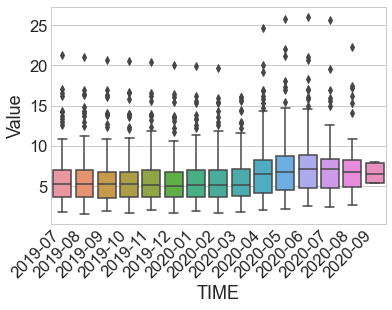

In [191]:
import seaborn as sns
sns.boxplot(x='TIME', y='Value', data=reduced_unemployment)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()

In [192]:
groupby_unemployment = reduced_unemployment[reduced_unemployment['Subject']=='All'].groupby('TIME').agg(value = ('Value','mean')).reset_index()

groupby_unemployment




,TIME,value
0,2019-07,5.968395
1,2019-08,5.945598
2,2019-09,5.911574
3,2019-10,5.864917
4,2019-11,5.871050
5,2019-12,5.805578
6,2020-01,5.902369
7,2020-02,5.866988
8,2020-03,6.020040
9,2020-04,7.255755


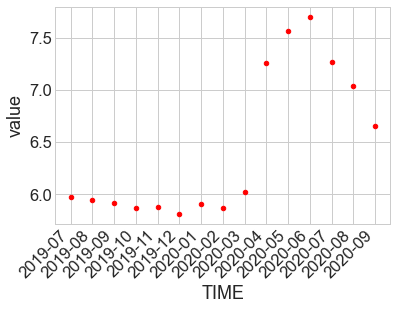

In [193]:
groupby_unemployment.plot(kind='scatter',x='TIME',y='value',color='red')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()

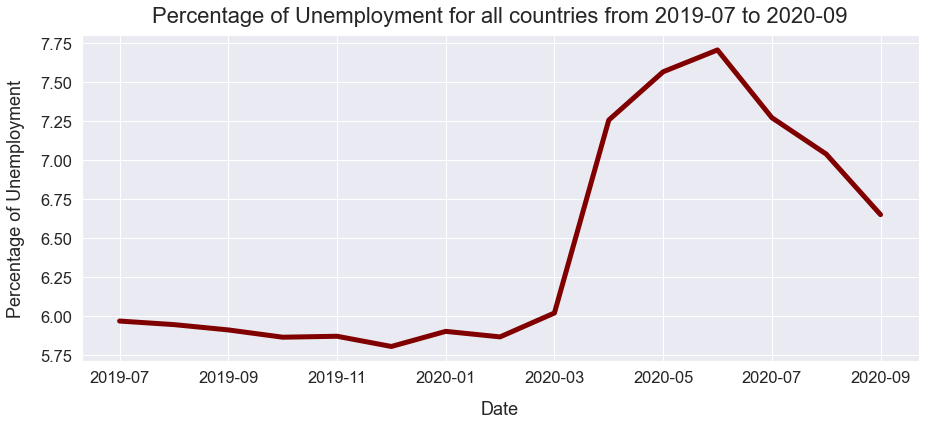

In [194]:
import seaborn as sns
sns.set(font_scale=1.5)
groupby_unemployment.set_index('TIME')['value'].plot(figsize=(15, 6), linewidth= 5, color='maroon')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Percentage of Unemployment", labelpad=15)
plt.title("Percentage of Unemployment for all countries from 2019-07 to 2020-09", y=1.02, fontsize=22);

### Percentage of Unemployment for all countries from 2019-07 to 2020-09

Here we can see that from 2020-03 the Unemployment rate goes higher in a high slope. This denotes that employment rate reduces after the COVID started everwhere.



Lets check the case for Australia alone

In [195]:
groupby_unemployment_aus = aus_unemployment[aus_unemployment['Subject']=='All'].groupby('TIME').agg(value = ('Value','mean')).reset_index()

groupby_unemployment_aus.head()




,TIME,value
0,2019-07,5.247642
1,2019-08,5.247114
2,2019-09,5.200466
3,2019-10,5.297851
4,2019-11,5.145150


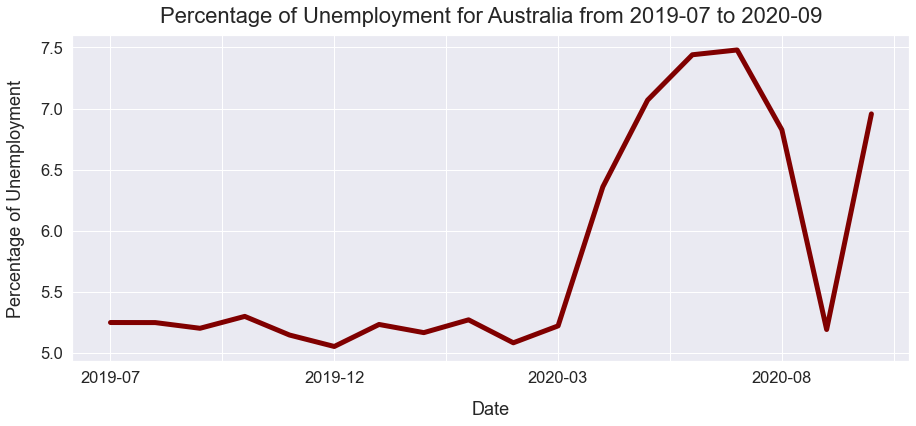

In [196]:
import seaborn as sns
sns.set(font_scale=1.5)
groupby_unemployment_aus.set_index('TIME')['value'].plot(figsize=(15, 6), linewidth= 5, color='maroon')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Percentage of Unemployment", labelpad=15)
plt.title("Percentage of Unemployment for Australia from 2019-07 to 2020-09", y=1.02, fontsize=22);

### Percentage of Unemployment for Australia from 2019-07 to 2020-09

Here we can see that from 2020-03 the Unemployment rate for Australia goes higher in a high slope. This denotes that employment rate reduces after the COVID started everwhere.

But here it goes down after 2020- 08 and again goes high



Lets check the case for Australia alone

In [197]:
unemploymentAll = reduced_unemployment[reduced_unemployment['Subject']=='All'].reset_index(drop=True)

pivot_unemployment = unemploymentAll.pivot(index='Country',columns='TIME',values='Value')
pivot_unemployment.count()

TIME
2019-07    39
2019-08    39
2019-09    39
2019-10    39
2019-11    39
2019-12    39
2020-01    39
2020-02    39
2020-03    39
2020-04    39
2020-05    39
2020-06    39
2020-07    36
2020-08    32
2020-09     2
dtype: int64

In [198]:
pivot_unemployment.head()

TIME,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
Country,,,,,,,,,,,,,,,
Australia,5.247642,5.247114,5.200466,5.297851,5.145150,5.051473,5.269611,5.081623,5.220101,6.358871,7.068942,7.440282,7.479592,6.825381,NaN
Austria,4.500000,4.500000,4.500000,4.300000,4.200000,4.200000,4.400000,4.500000,4.600000,4.700000,5.500000,5.400000,5.200000,5.000000,NaN
Belgium,5.300000,5.200000,5.200000,5.200000,5.200000,5.200000,5.100000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,5.100000,NaN
Canada,5.700000,5.700000,5.500000,5.600000,5.900000,5.600000,5.500000,5.600000,7.800000,13.000000,13.700000,12.300000,10.900000,10.200000,NaN
Chile,7.235124,7.132981,7.113156,7.248283,7.594489,7.840505,8.102612,8.182692,9.064610,10.888670,11.768420,12.346270,12.317590,NaN,NaN


In [199]:
pivot_unemployment.reset_index(inplace=True)
#pivot_unemployment.dropna(inplace=True)
pivot_unemployment.head()

TIME,Country,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,Australia,5.247642,5.247114,5.200466,5.297851,5.145150,5.051473,5.269611,5.081623,5.220101,6.358871,7.068942,7.440282,7.479592,6.825381,NaN
1,Austria,4.500000,4.500000,4.500000,4.300000,4.200000,4.200000,4.400000,4.500000,4.600000,4.700000,5.500000,5.400000,5.200000,5.000000,NaN
2,Belgium,5.300000,5.200000,5.200000,5.200000,5.200000,5.200000,5.100000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,5.100000,NaN
3,Canada,5.700000,5.700000,5.500000,5.600000,5.900000,5.600000,5.500000,5.600000,7.800000,13.000000,13.700000,12.300000,10.900000,10.200000,NaN
4,Chile,7.235124,7.132981,7.113156,7.248283,7.594489,7.840505,8.102612,8.182692,9.064610,10.888670,11.768420,12.346270,12.317590,NaN,NaN


In [200]:
pivot_unemployment.count()

TIME
Country    39
2019-07    39
2019-08    39
2019-09    39
2019-10    39
2019-11    39
2019-12    39
2020-01    39
2020-02    39
2020-03    39
2020-04    39
2020-05    39
2020-06    39
2020-07    36
2020-08    32
2020-09     2
dtype: int64

Here we can see that for 2020-09 there are only 2 values. So its better that we remove the data for 2020-09

and for 2020-08 there are only 32 values, lets remove the countries which do not have 2020-08

In [201]:
pivot_unemployment.drop(['2020-09'],axis=1,inplace=True)

In [202]:
pivot_unemployment.dropna(inplace=True)
pivot_unemployment.count()

TIME
Country    32
2019-07    32
2019-08    32
2019-09    32
2019-10    32
2019-11    32
2019-12    32
2020-01    32
2020-02    32
2020-03    32
2020-04    32
2020-05    32
2020-06    32
2020-07    32
2020-08    32
dtype: int64

In [203]:
pivot_unemployment.head(40)

TIME,Country,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
0,Australia,5.247642,5.247114,5.200466,5.297851,5.145150,5.051473,5.269611,5.081623,5.220101,6.358871,7.068942,7.440282,7.479592,6.825381
1,Austria,4.500000,4.500000,4.500000,4.300000,4.200000,4.200000,4.400000,4.500000,4.600000,4.700000,5.500000,5.400000,5.200000,5.000000
2,Belgium,5.300000,5.200000,5.200000,5.200000,5.200000,5.200000,5.100000,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,5.100000
3,Canada,5.700000,5.700000,5.500000,5.600000,5.900000,5.600000,5.500000,5.600000,7.800000,13.000000,13.700000,12.300000,10.900000,10.200000
5,Colombia,10.395290,11.268730,10.702820,10.963840,10.677410,10.284460,10.610460,10.850700,12.197360,20.069770,21.165020,20.699180,19.606670,17.466470
6,Czech Republic,2.000000,1.900000,2.100000,2.000000,2.100000,2.000000,2.000000,2.000000,2.100000,2.200000,2.400000,2.700000,2.600000,2.700000
7,Denmark,4.600000,4.900000,5.200000,5.200000,5.100000,4.900000,4.900000,4.900000,4.800000,4.900000,5.500000,6.000000,6.300000,6.100000
9,Euro area (19 countries),7.500000,7.500000,7.500000,7.400000,7.400000,7.400000,7.400000,7.300000,7.200000,7.400000,7.600000,7.800000,8.000000,8.100000
10,European Union – 27 countries (from 01/02/2020),6.700000,6.600000,6.600000,6.600000,6.600000,6.500000,6.600000,6.500000,6.500000,6.700000,6.900000,7.100000,7.300000,7.400000
11,Finland,6.900000,6.900000,6.900000,6.900000,6.800000,6.800000,6.800000,6.900000,7.000000,7.300000,7.500000,7.800000,8.000000,8.100000


From this, lets also remove European Union – 27 countries (from 01/02/2020)','OECD - Total','Euro area (19 countries)','G7'

In [204]:
pivot_unemployment = pivot_unemployment[pivot_unemployment.Country != 'European Union – 27 countries (from 01/02/2020)']
pivot_unemployment = pivot_unemployment[pivot_unemployment.Country != 'OECD - Total']
pivot_unemployment = pivot_unemployment[pivot_unemployment.Country != 'Euro area (19 countries)']
pivot_unemployment = pivot_unemployment[pivot_unemployment.Country != 'G7']

## Prediction

In [205]:
y = pivot_unemployment['2020-08']
x = pivot_unemployment.drop(['2020-08','Country'],axis=1)

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [207]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [208]:
def print_result(results):
    print('BEST PARAMS:{}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{}(+/-{}) for {}'.format(round(mean,3), round(std*2,3), params))

In [209]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
param_grid = {
    'alpha' :[0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
lm = grid.fit(X_train, y_train)

print_result(lm)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


BEST PARAMS:{'alpha': 1}

0.914(+/-0.126) for {'alpha': 0.001}
0.931(+/-0.103) for {'alpha': 0.01}
0.952(+/-0.08) for {'alpha': 0.1}
0.967(+/-0.056) for {'alpha': 1}
0.94(+/-0.141) for {'alpha': 10}
0.917(+/-0.153) for {'alpha': 100}
0.53(+/-0.457) for {'alpha': 1000}


In [210]:
#saving the model
joblib.dump(lm.best_estimator_,'linear')

['linear']

### K nearest neighbors

In [211]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [212]:
def print_result(results):
    print('BEST PARAMS:{}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{}(+/-{}) for {}'.format(round(mean,3), round(std*2,3), params))

In [213]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

# model = GridSearchCV(knn, params, cv=5)
knn = GridSearchCV(knn, param_grid=params, scoring='r2',cv=5)
knn = knn.fit(X_train,y_train)
print_result(knn)

BEST PARAMS:{'n_neighbors': 1}

0.628(+/-0.308) for {'n_neighbors': 1}
0.603(+/-0.266) for {'n_neighbors': 2}
0.529(+/-0.674) for {'n_neighbors': 3}
0.517(+/-0.852) for {'n_neighbors': 4}
0.344(+/-1.266) for {'n_neighbors': 5}
0.14(+/-1.744) for {'n_neighbors': 6}
-0.03(+/-2.177) for {'n_neighbors': 7}
-0.14(+/-2.217) for {'n_neighbors': 8}
-0.384(+/-2.485) for {'n_neighbors': 9}
-0.647(+/-2.808) for {'n_neighbors': 10}


In [214]:
joblib.dump(knn.best_estimator_,'knn')

['knn']

## Random Forest

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [216]:
rf = RandomForestRegressor(random_state = 42)
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rfcv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rfcv.fit(X_train, y_train)
rfcv.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.6min finished


{'bootstrap': True,
 'max_depth': 100,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [217]:
print_result(rfcv)

BEST PARAMS:{'bootstrap': True, 'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}

-0.05(+/-1.08) for {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
-0.103(+/-1.118) for {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
-0.019(+/-0.915) for {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
-0.041(+/-0.958) for {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
-0.643(+/-1.458) for {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
-0.685(+/-1.572) for {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}
-0.75(+/-1.687) for {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300

In [218]:
joblib.dump(rfcv.best_estimator_,'randomForest')

['randomForest']

## SVR

In [219]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import StandardScaler

svr = SVR(kernel='rbf')

gsc = GridSearchCV(
        estimator=svr,
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [220]:
gsc.fit(X_train, y_train)
print_result(gsc)

BEST PARAMS:{'C': 1000, 'epsilon': 0.05, 'gamma': 0.001}

-12.393(+/-24.651) for {'C': 0.1, 'epsilon': 0.0001, 'gamma': 0.0001}
-11.862(+/-24.132) for {'C': 0.1, 'epsilon': 0.0001, 'gamma': 0.001}
-11.328(+/-24.456) for {'C': 0.1, 'epsilon': 0.0001, 'gamma': 0.005}
-11.987(+/-24.834) for {'C': 0.1, 'epsilon': 0.0001, 'gamma': 0.1}
-12.474(+/-24.786) for {'C': 0.1, 'epsilon': 0.0001, 'gamma': 1}
-12.505(+/-24.79) for {'C': 0.1, 'epsilon': 0.0001, 'gamma': 3}
-12.506(+/-24.79) for {'C': 0.1, 'epsilon': 0.0001, 'gamma': 5}
-12.393(+/-24.651) for {'C': 0.1, 'epsilon': 0.0005, 'gamma': 0.0001}
-11.862(+/-24.132) for {'C': 0.1, 'epsilon': 0.0005, 'gamma': 0.001}
-11.328(+/-24.456) for {'C': 0.1, 'epsilon': 0.0005, 'gamma': 0.005}
-11.986(+/-24.834) for {'C': 0.1, 'epsilon': 0.0005, 'gamma': 0.1}
-12.474(+/-24.785) for {'C': 0.1, 'epsilon': 0.0005, 'gamma': 1}
-12.505(+/-24.789) for {'C': 0.1, 'epsilon': 0.0005, 'gamma': 3}
-12.506(+/-24.79) for {'C': 0.1, 'epsilon': 0.0005, 'gamma': 5}
-12.3

In [221]:
joblib.dump(gsc.best_estimator_,'svr')

['svr']

In [222]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [223]:
y_train.dtypes

dtype('float64')

## xgboost

In [224]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
xgb_reg=XGBRegressor()

prams={
    'learning_rate':[0.03,0.05,0.1],
    'n_estimators':[500,2000,4000],
    'max_depth':[5,7,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
tscv = TimeSeriesSplit(n_splits=3)
random_clf=RandomizedSearchCV(xgb_reg, param_distributions=prams,verbose=1,
                                n_jobs=3, cv = tscv, n_iter=10)
random_clf.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    1.8s finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=na...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample

In [225]:
joblib.dump(random_clf.best_estimator_,'xgb')

['xgb']

## Comparison

In [226]:
models = {}
for mdl in ['linear', 'knn', 'randomForest','svr','xgb']:
    models[mdl] = joblib.load('{}'.format(mdl))

In [227]:
from time import time
from sklearn import metrics
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    print('Model Performance')
    
    mse = np.sqrt(metrics.mean_squared_error(labels,pred ))
    r_squared = round(metrics.r2_score(labels, pred),3)
    
    print('{} -- MSE: {} | R-squared: {} |Latency: {}ms'.format(name,
                                                                mse,
                                                                r_squared,
                                                                round((end - start)*1000, 1)))

In [228]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)
    print('-----------------------------------------')

Model Performance
linear -- MSE: 0.6189720228323046 | R-squared: 0.978 |Latency: 2.1ms
-----------------------------------------
Model Performance
knn -- MSE: 0.8741272272063719 | R-squared: 0.956 |Latency: 3.6ms
-----------------------------------------
Model Performance
randomForest -- MSE: 2.4862251854876907 | R-squared: 0.644 |Latency: 11.4ms
-----------------------------------------
Model Performance
svr -- MSE: 0.609027730353516 | R-squared: 0.979 |Latency: 2.0ms
-----------------------------------------
Model Performance
xgb -- MSE: 0.9203528312984577 | R-squared: 0.951 |Latency: 2.1ms
-----------------------------------------


## Prediction

In [229]:
data = pivot_unemployment.drop('Country',axis=1)

In [230]:
# Australia = unemploymentAll.drop(['country','2019-07'],axis=1)
# models['knn'].predict(Australia)
def unemploymentPrediction(months,data):
    for i in range(1,months+1):
        data = data.drop([data.columns[0]],axis=1)
        new_month = models['svr'].predict(data)
        data['predicted-month'+str(i)] = new_month
        
    return data

In [231]:
final = unemploymentPrediction(7,data)
final

TIME,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,predicted-month1,predicted-month2,predicted-month3,predicted-month4,predicted-month5,predicted-month6,predicted-month7
0,5.081623,5.220101,6.358871,7.068942,7.440282,7.479592,6.825381,6.295306,5.944747,5.947180,6.048744,6.226404,6.481067,6.650282
1,4.500000,4.600000,4.700000,5.500000,5.400000,5.200000,5.000000,4.887818,4.512223,4.434179,4.539700,4.678051,4.707345,4.987816
2,5.000000,5.000000,5.100000,5.000000,5.000000,5.000000,5.100000,5.174667,5.300299,5.388778,5.427857,5.403051,5.397355,5.355652
3,5.600000,7.800000,13.000000,13.700000,12.300000,10.900000,10.200000,9.576740,10.123642,11.233392,11.469979,10.767948,11.234089,12.045361
5,10.850700,12.197360,20.069770,21.165020,20.699180,19.606670,17.466470,16.928358,16.234111,15.223789,14.165713,12.947526,12.484952,12.049493
6,2.000000,2.100000,2.200000,2.400000,2.700000,2.600000,2.700000,2.807248,2.805225,2.737098,2.768145,2.761331,2.729474,2.758831
7,4.900000,4.800000,4.900000,5.500000,6.000000,6.300000,6.100000,5.979795,5.690291,5.428231,5.314875,5.391781,5.431293,5.540196
11,6.900000,7.000000,7.300000,7.500000,7.800000,8.000000,8.100000,8.111485,8.208620,8.318544,8.468945,8.637084,8.867772,9.068468
12,7.700000,7.500000,7.800000,6.900000,6.600000,7.100000,7.500000,7.912694,8.426577,8.802935,8.792643,8.746529,9.069946,9.261807
14,3.600000,3.800000,4.000000,4.200000,4.300000,4.400000,4.400000,4.100808,3.845802,3.662703,3.555831,3.553791,3.736740,3.998063


In [232]:
Country_list = list(pivot_unemployment['Country'].values)
t201907 = list(pivot_unemployment['2019-07'].values)
t201908 = list(pivot_unemployment['2019-08'].values)
t201909 = list(pivot_unemployment['2019-09'].values)
t201910 = list(pivot_unemployment['2019-10'].values)
t201911 = list(pivot_unemployment['2019-11'].values)
t201912 = list(pivot_unemployment['2019-12'].values)
t202001 = list(pivot_unemployment['2020-01'].values)
t202002 = list(pivot_unemployment['2020-02'].values)
t202003 = list(pivot_unemployment['2020-03'].values)
t202004 = list(pivot_unemployment['2020-04'].values)
t202005 = list(pivot_unemployment['2020-05'].values)



In [233]:
final['Country'] = Country_list
final['2019-07'] = t201907
final['2019-08'] = t201908 
final['2019-09'] = t201909 
final['2019-10'] = t201910 
final['2019-11'] = t201911 
final['2019-12'] = t201912
final['2020-01'] = t202001
final['2020-02'] = t202002 
final['2020-03'] = t202003 
final['2020-04'] = t202004 
final['2020-05'] = t202005

In [234]:
final.columns

Index(['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', 'predicted-month1', 'predicted-month2', 'predicted-month3',
       'predicted-month4', 'predicted-month5', 'predicted-month6',
       'predicted-month7', 'Country', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01'],
      dtype='object', name='TIME')

In [235]:
cols = ['Country','2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07', '2020-08',
       'predicted-month1', 'predicted-month2', 'predicted-month3',
       'predicted-month4', 'predicted-month5', 'predicted-month6',
       'predicted-month7']
final = final[cols]
#del final['TIME']
final

TIME,Country,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,...,2020-06,2020-07,2020-08,predicted-month1,predicted-month2,predicted-month3,predicted-month4,predicted-month5,predicted-month6,predicted-month7
0,Australia,5.247642,5.247114,5.200466,5.297851,5.145150,5.051473,5.269611,5.081623,5.220101,...,7.440282,7.479592,6.825381,6.295306,5.944747,5.947180,6.048744,6.226404,6.481067,6.650282
1,Austria,4.500000,4.500000,4.500000,4.300000,4.200000,4.200000,4.400000,4.500000,4.600000,...,5.400000,5.200000,5.000000,4.887818,4.512223,4.434179,4.539700,4.678051,4.707345,4.987816
2,Belgium,5.300000,5.200000,5.200000,5.200000,5.200000,5.200000,5.100000,5.000000,5.000000,...,5.000000,5.000000,5.100000,5.174667,5.300299,5.388778,5.427857,5.403051,5.397355,5.355652
3,Canada,5.700000,5.700000,5.500000,5.600000,5.900000,5.600000,5.500000,5.600000,7.800000,...,12.300000,10.900000,10.200000,9.576740,10.123642,11.233392,11.469979,10.767948,11.234089,12.045361
5,Colombia,10.395290,11.268730,10.702820,10.963840,10.677410,10.284460,10.610460,10.850700,12.197360,...,20.699180,19.606670,17.466470,16.928358,16.234111,15.223789,14.165713,12.947526,12.484952,12.049493
6,Czech Republic,2.000000,1.900000,2.100000,2.000000,2.100000,2.000000,2.000000,2.000000,2.100000,...,2.700000,2.600000,2.700000,2.807248,2.805225,2.737098,2.768145,2.761331,2.729474,2.758831
7,Denmark,4.600000,4.900000,5.200000,5.200000,5.100000,4.900000,4.900000,4.900000,4.800000,...,6.000000,6.300000,6.100000,5.979795,5.690291,5.428231,5.314875,5.391781,5.431293,5.540196
11,Finland,6.900000,6.900000,6.900000,6.900000,6.800000,6.800000,6.800000,6.900000,7.000000,...,7.800000,8.000000,8.100000,8.111485,8.208620,8.318544,8.468945,8.637084,8.867772,9.068468
12,France,8.500000,8.500000,8.400000,8.300000,8.200000,8.200000,8.100000,7.700000,7.500000,...,6.600000,7.100000,7.500000,7.912694,8.426577,8.802935,8.792643,8.746529,9.069946,9.261807
14,Germany,3.000000,3.000000,3.100000,3.100000,3.200000,3.300000,3.400000,3.600000,3.800000,...,4.300000,4.400000,4.400000,4.100808,3.845802,3.662703,3.555831,3.553791,3.736740,3.998063


In [236]:
final_melt = pd.melt(final, id_vars =['Country'], value_vars =['2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07', '2020-08',
       'predicted-month1', 'predicted-month2', 'predicted-month3',
       'predicted-month4', 'predicted-month5', 'predicted-month6',
       'predicted-month7']) 
final_melt

,Country,TIME,value
0,Australia,2019-07,5.247642
1,Austria,2019-07,4.500000
2,Belgium,2019-07,5.300000
3,Canada,2019-07,5.700000
4,Colombia,2019-07,10.395290
...,...,...,...
583,Slovak Republic,predicted-month7,7.090398
584,Slovenia,predicted-month7,4.954031
585,Spain,predicted-month7,14.349466
586,Sweden,predicted-month7,10.433831


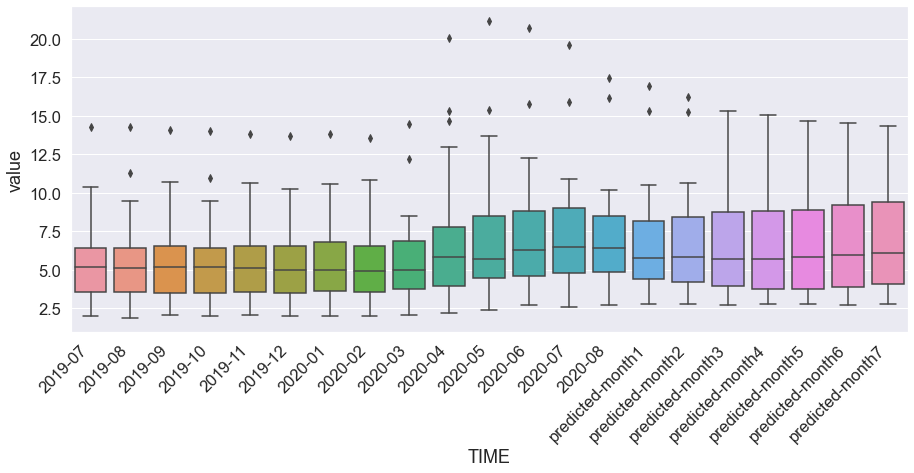

In [237]:
plt.figure(figsize=(15,6))
sns.boxplot(x='TIME', y='value', data=final_melt)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()